In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt
import seaborn as sns

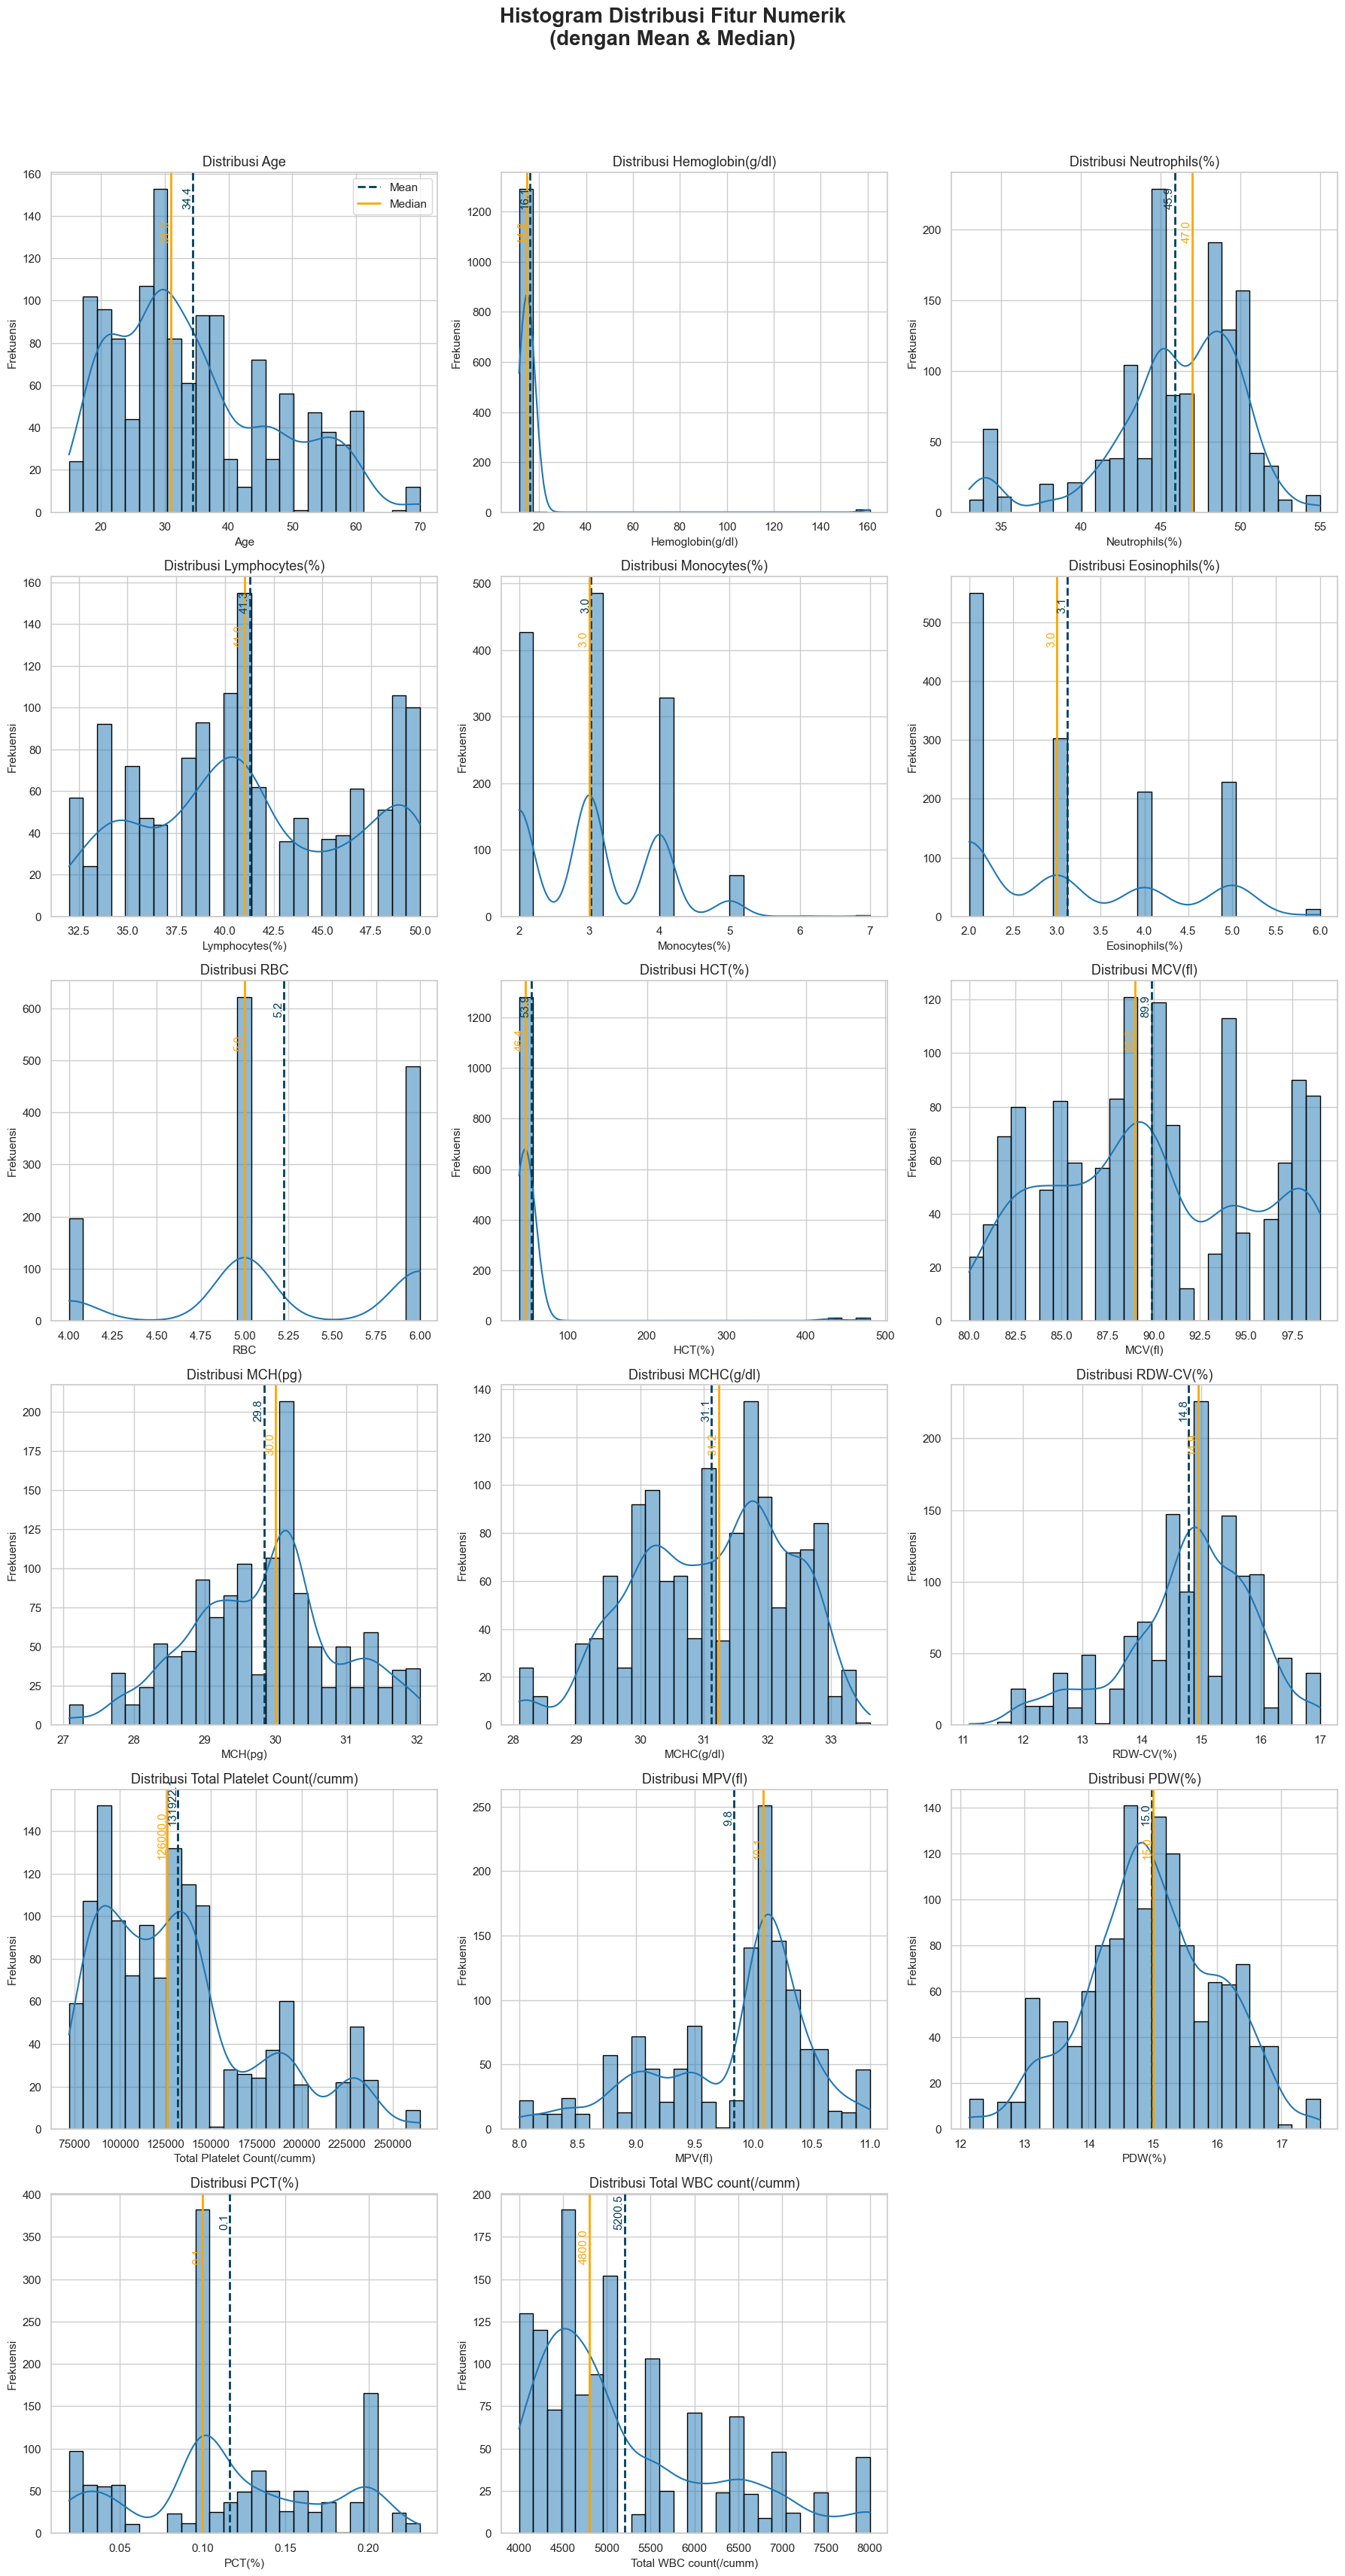

In [13]:
# Load dataset
df = pd.read_csv('data_dbd.csv')

# Fitur numerik
features = [
     "Age", "Hemoglobin(g/dl)", "Neutrophils(%)", "Lymphocytes(%)", "Monocytes(%)", "Eosinophils(%)",
    "RBC", "HCT(%)", "MCV(fl)", "MCH(pg)", "MCHC(g/dl)", "RDW-CV(%)", "Total Platelet Count(/cumm)", 
    "MPV(fl)", "PDW(%)", "PCT(%)", "Total WBC count(/cumm)"]
# Set gaya visualisasi
sns.set(style='whitegrid')
plt.rcParams.update({
    'font.size': 11,
    'axes.titlesize': 13,
    'axes.labelsize': 11
})

# Warna
blue_color = '#1f77b4'
mean_color = '#003f5c'
median_color = '#ffa600'

# -----------------------------
# Histogram Grid Dinamis
# -----------------------------
n_features = len(features)
cols = 3
rows = (n_features + cols - 1) // cols  # Hitung jumlah baris berdasarkan jumlah kolom

fig, axes = plt.subplots(rows, cols, figsize=(18, 6 * rows))
fig.suptitle('Histogram Distribusi Fitur Numerik\n(dengan Mean & Median)', fontsize=20, fontweight='bold')

# Jika hanya 1 baris, axes tidak dalam array 2D, kita ubah agar konsisten
if rows == 1:
    axes = [axes]

for i, feature in enumerate(features):
    row = i // cols
    col = i % cols
    ax = axes[row][col]

    sns.histplot(df[feature], kde=True, ax=ax, color=blue_color, bins=25, edgecolor='black')

    mean_val = df[feature].mean()
    median_val = df[feature].median()

    ax.axvline(mean_val, color=mean_color, linestyle='--', linewidth=2, label='Mean')
    ax.axvline(median_val, color=median_color, linestyle='-', linewidth=2, label='Median')

    ax.text(mean_val, ax.get_ylim()[1]*0.9, f'{mean_val:.1f}', color=mean_color, rotation=90, ha='right')
    ax.text(median_val, ax.get_ylim()[1]*0.8, f'{median_val:.1f}', color=median_color, rotation=90, ha='right')

    ax.set_title(f'Distribusi {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Frekuensi')

    if i == 0:
        ax.legend()

# Kosongkan sisa subplot yang tidak terpakai (jika ada)
total_plots = rows * cols
for j in range(n_features, total_plots):
    fig.delaxes(axes[j // cols][j % cols])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('histogram_fitur_numerik.png', dpi=300)
plt.show()

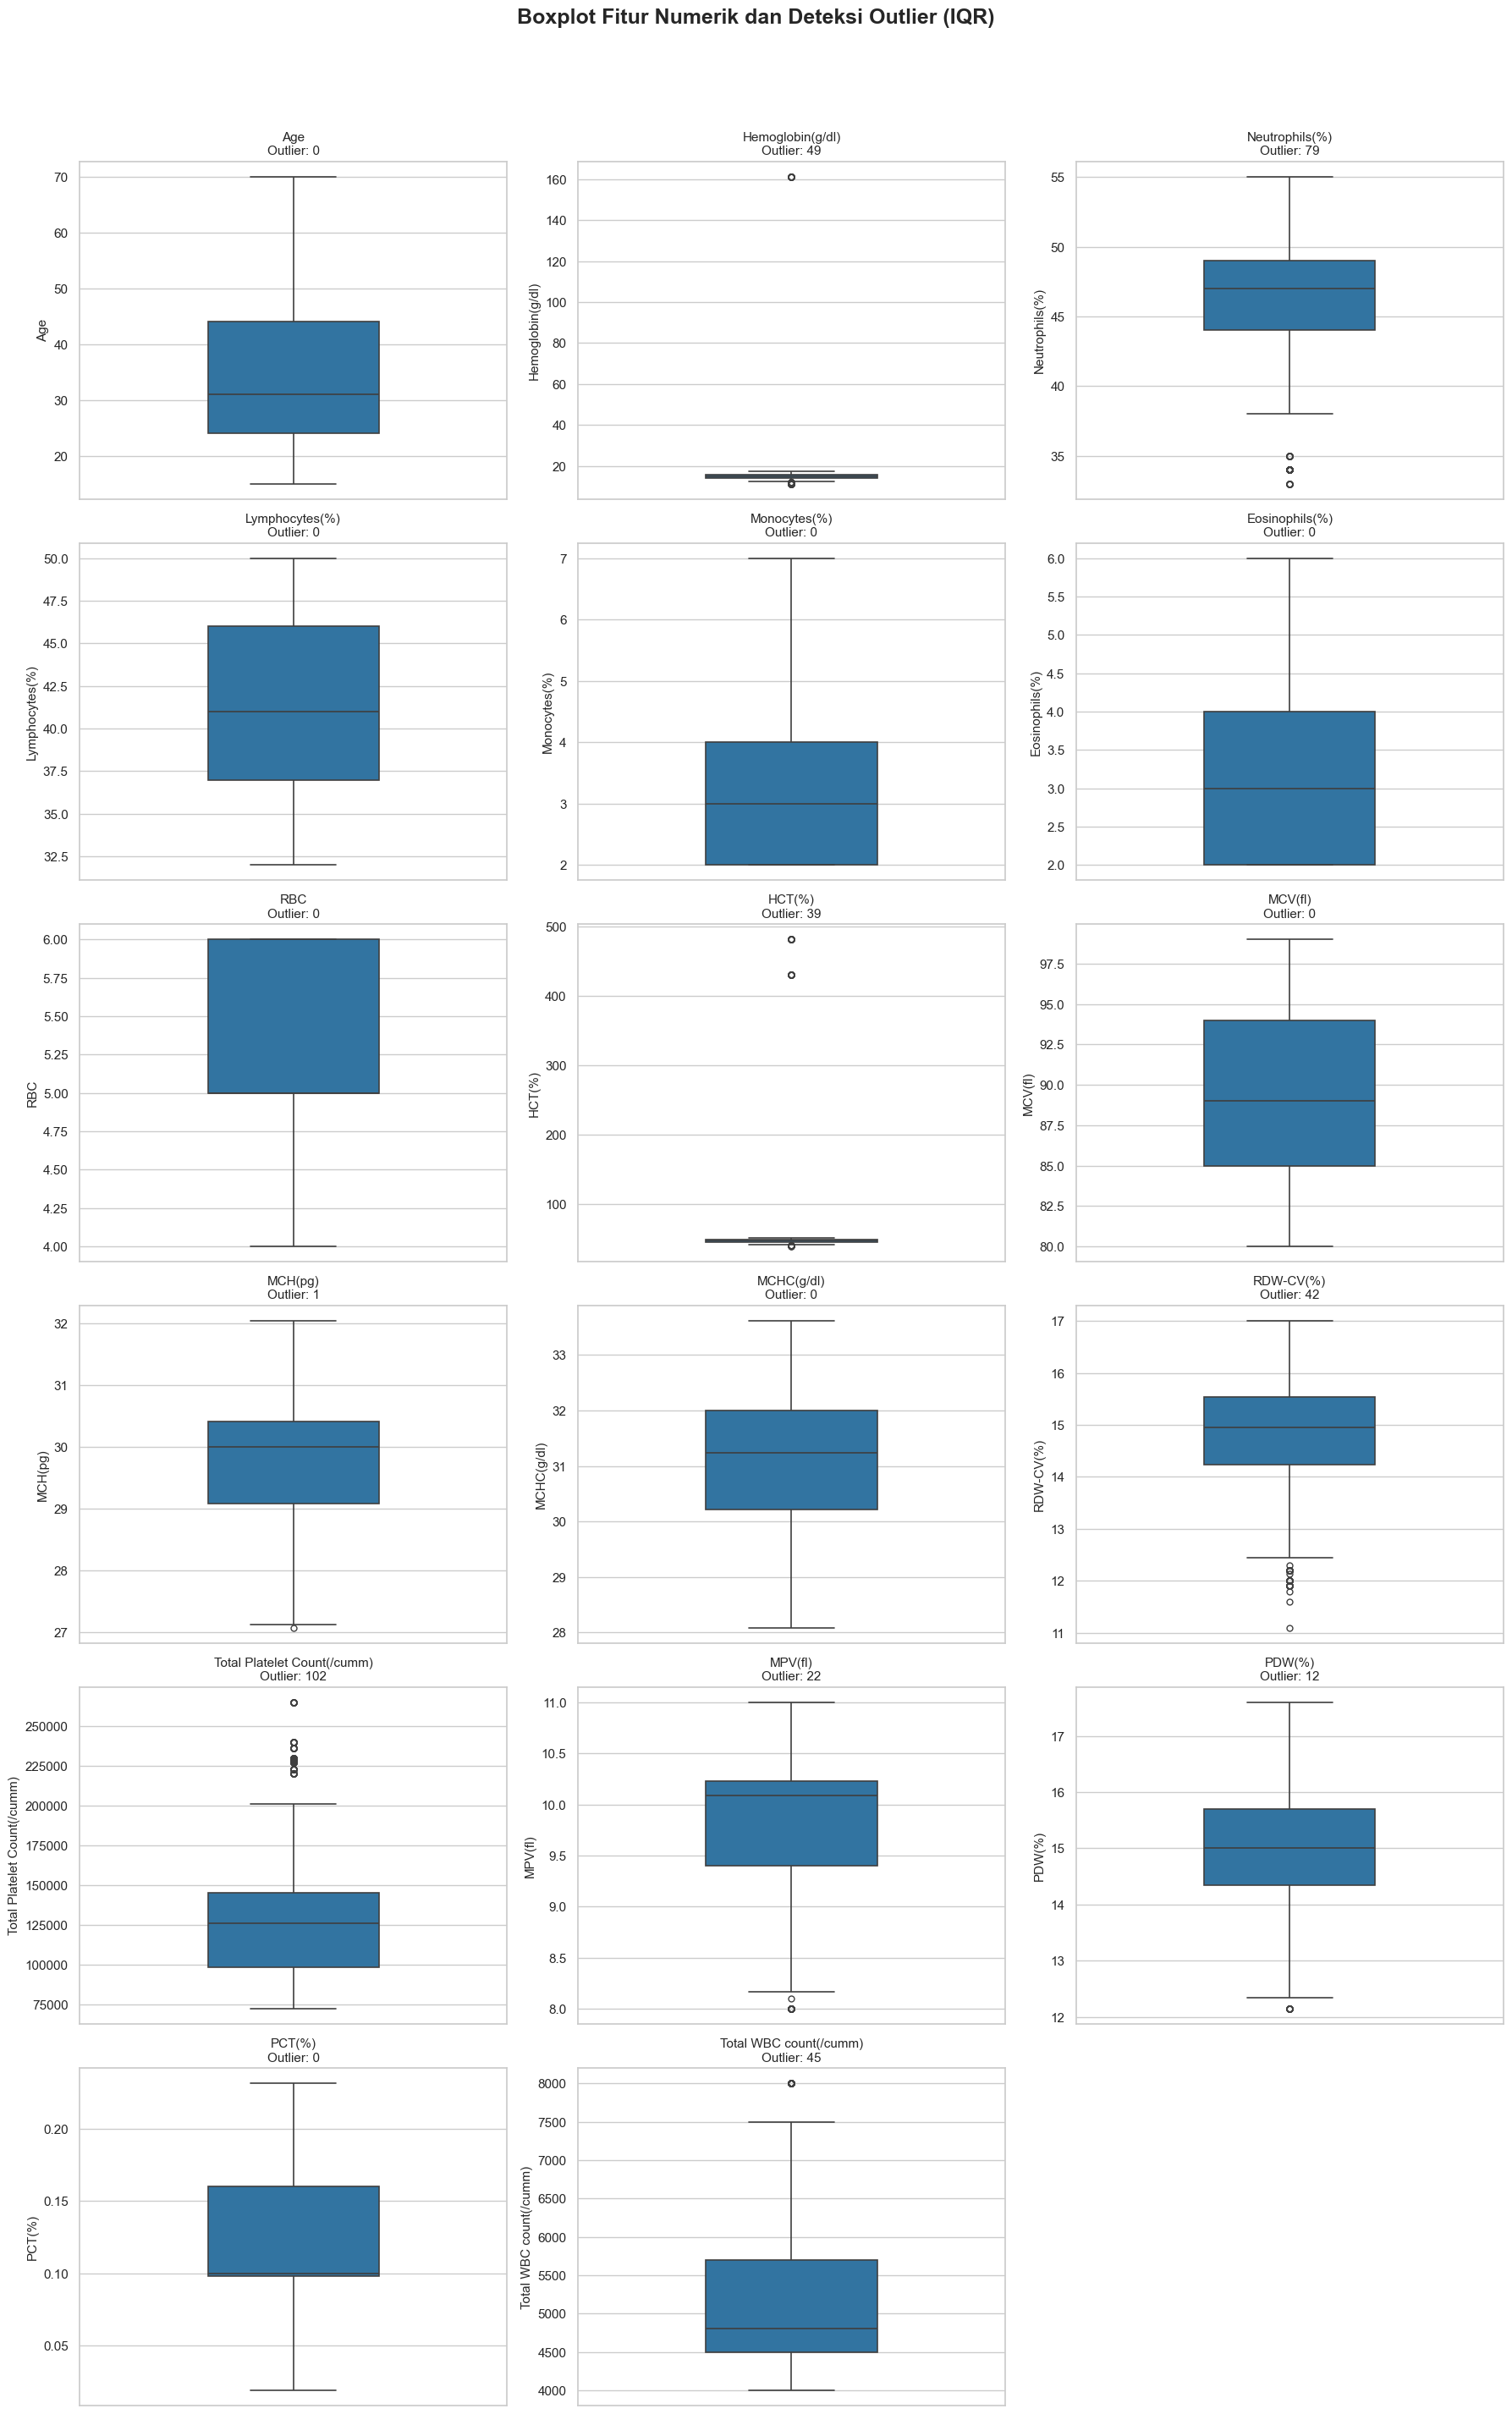


Fitur yang memiliki outlier dan jumlahnya:
- Hemoglobin(g/dl): 49 data
- Neutrophils(%): 79 data
- HCT(%): 39 data
- MCH(pg): 1 data
- RDW-CV(%): 42 data
- Total Platelet Count(/cumm): 102 data
- MPV(fl): 22 data
- PDW(%): 12 data
- Total WBC count(/cumm): 45 data


In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Muat data
df = pd.read_csv("data_dbd.csv")

# Daftar fitur numerik
features = [
    "Age", "Hemoglobin(g/dl)", "Neutrophils(%)", "Lymphocytes(%)", "Monocytes(%)", "Eosinophils(%)",
    "RBC", "HCT(%)", "MCV(fl)", "MCH(pg)", "MCHC(g/dl)", "RDW-CV(%)", "Total Platelet Count(/cumm)",
    "MPV(fl)", "PDW(%)", "PCT(%)", "Total WBC count(/cumm)"
]

# Warna
blue_color = '#1f77b4'

# Simpan fitur dan jumlah outlier
outlier_summary = {}

# Layout grid otomatis
cols = 3
rows = (len(features) + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(6 * cols, 5 * rows))
fig.suptitle('Boxplot Fitur Numerik dan Deteksi Outlier (IQR)', fontsize=18, fontweight='bold')

# Jika hanya 1 baris, ubah axes agar tetap bisa diakses 2D
if rows == 1:
    axes = [axes]

for i, feature in enumerate(features):
    row = i // cols
    col = i % cols
    ax = axes[row][col] if rows > 1 else axes[col]

    # Hitung IQR
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Hitung jumlah outlier
    outlier_count = df[(df[feature] < lower) | (df[feature] > upper)].shape[0]

    # Simpan jika ada
    if outlier_count > 0:
        outlier_summary[feature] = outlier_count

    # Plot boxplot
    sns.boxplot(y=df[feature], ax=ax, color=blue_color, fliersize=5, linewidth=1.2, width=0.4)
    ax.set_title(f'{feature}\nOutlier: {outlier_count}', fontsize=11)
    ax.set_ylabel(feature)

# Kosongkan sisa subplot jika ada grid kosong
total_plots = rows * cols
for j in range(len(features), total_plots):
    fig.delaxes(axes[j // cols][j % cols])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('boxplot_fitur_numerik.png', dpi=300)
plt.show()

# Ringkasan
print("\nFitur yang memiliki outlier dan jumlahnya:")
for f, c in outlier_summary.items():
    print(f"- {f}: {c} data")


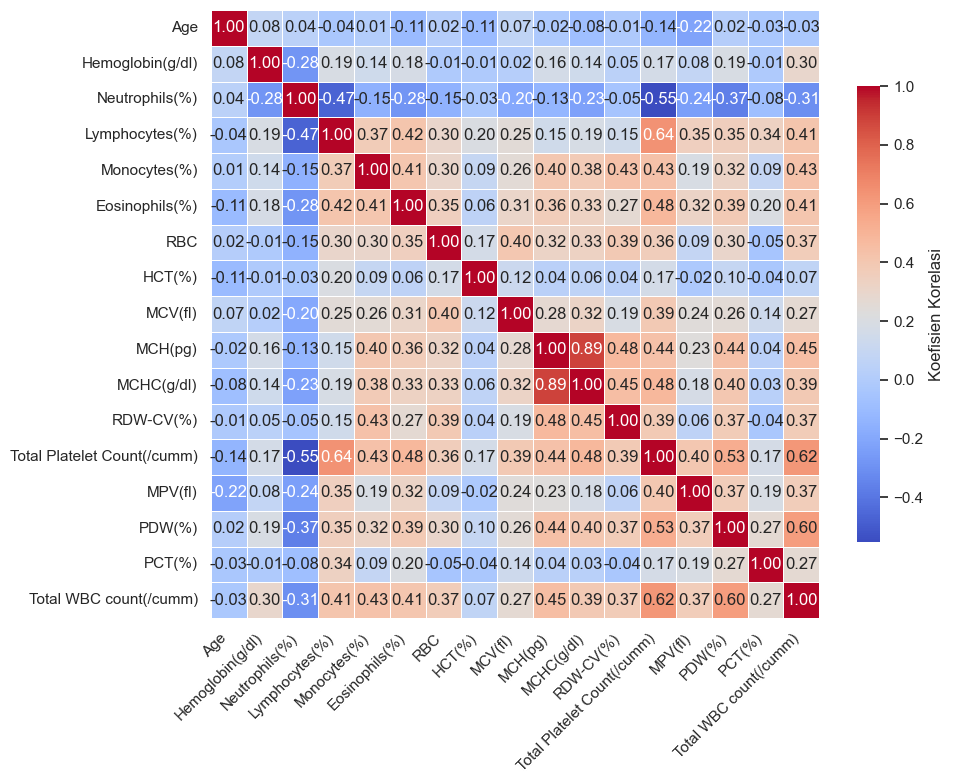

In [16]:
# Daftar fitur numerik
features = [
    "Age", "Hemoglobin(g/dl)", "Neutrophils(%)", "Lymphocytes(%)", "Monocytes(%)", "Eosinophils(%)",
    "RBC", "HCT(%)", "MCV(fl)", "MCH(pg)", "MCHC(g/dl)", "RDW-CV(%)", "Total Platelet Count(/cumm)",
    "MPV(fl)", "PDW(%)", "PCT(%)", "Total WBC count(/cumm)"
]

# Hitung korelasi antar fitur numerik
corr_matrix = df[features].corr(method='pearson')

# Set style visual
sns.set(style='white')

# Ukuran plot
plt.figure(figsize=(10, 8))

# Plot heatmap korelasi
heatmap = sns.heatmap(
    corr_matrix,
    annot=True,               # Tampilkan nilai korelasi
    fmt=".2f",                # Format angka
    cmap='coolwarm',          # Skema warna
    linewidths=0.5,           # Garis pemisah antar sel
    square=True,              # Bentuk persegi
    cbar_kws={"shrink": .75, "label": "Koefisien Korelasi"}  # Colorbar
)

# Judul dan tata letak
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()